# Phenotype summaries
## Mothers
We combined the mothers data: TF1–3 and FOM. After removing outliers, our sample size was N=946.


| Mother               | Mother           | Mother         | Child   | Child     | Child       | Child       |
|----------------------|------------------|----------------|---------|-----------|-------------|-------------|
| Antenatal (~28,7yrs) | TF1-3 (~42.9yrs) | FOM (~47.8yrs) |   Cord  | 7yrs (F7) | 15yrs (TF3) | 17yrs (F17) |
|          n/a         |        n/a       |       n/a      | n = 914 |  n = 980  |   n = 254   |   n = 727   |
|        n = 987       |      n = 182     |     n = 810    |   n/a   |    n/a    |     n/a     |     n/a     |

In [62]:
setwd("~/projects/cannabis/shared_data/post_qc/alspac/phenotype/")

In [63]:
### R 
pheno_mothers <- read.csv("pheno_mothers_combined_FOM_TF1_3_n946_ewas.txt",
                         sep = " ")
dim(pheno_mothers)
head(pheno_mothers, 2)

[1] 946  21

,Sample_Name,cidB3176,ALN,qlet,age_at_DNAm,cannabisUse,smoking,drinking,BMI,Bcell,⋯,CD8T,Gran,Mono,NK,sv1,sv2,sv3,sv4,sv5,sv6
,<chr>,<int>,<int>,<chr>,<dbl>,<int>,<chr>,<chr>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,SLIDE1_R01C02,16631,33734,A,47,2,Never,Current,21.7191,0.13338220,⋯,0,0.466291,0.07133092,0.1791828,16055.045,4235.988,-3047.956,-8862.0433,-5299.007,-3390.971
2,SLIDE1_R03C01,18360,41525,A,53,2,Current,Ever,35.0992,0.06719821,⋯,0,0.614241,0.11582733,0.1241623,-2470.976,-2476.585,2841.127,381.4923,-5396.112,-1125.347


In [64]:
table(pheno_mothers$cannabisUse)
prop.table(table(pheno_mothers$cannabisUse))


  1   2 
 80 864 


         1          2 
0.08474576 0.91525424 

```
1 means ever used cannabis, and 2 means never used.
 -- Fang Fang
```

### BMI

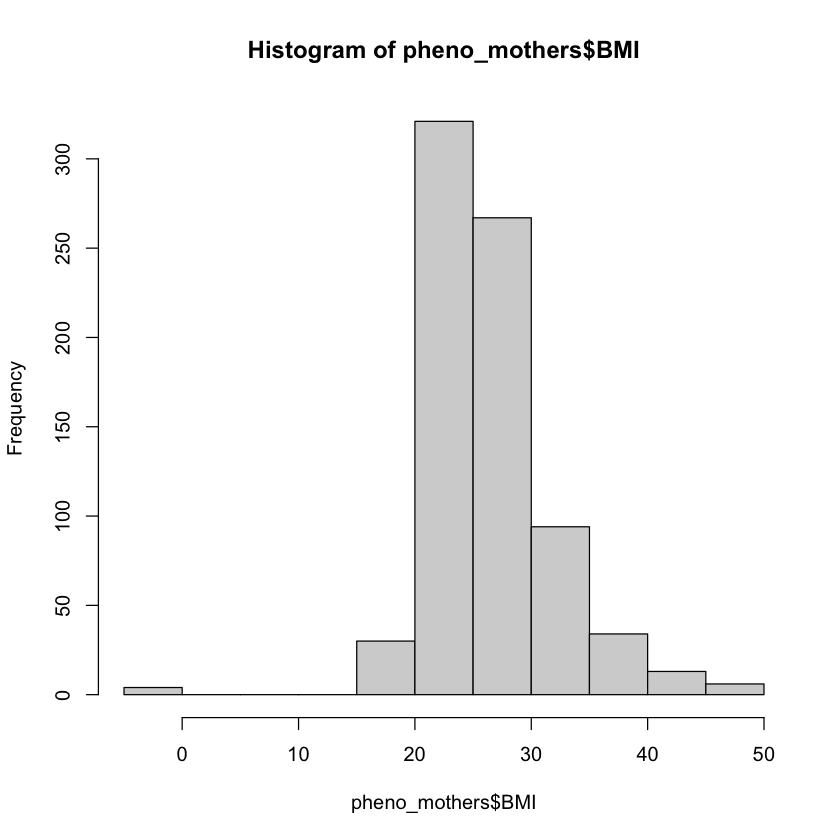

In [65]:
hist(pheno_mothers$BMI)

Generalized Linear Model (GLM). See the YouTube videos [GLM Intro - 1 - Linear Models vs. Generalized Linear Models](https://www.youtube.com/watch?v=ddCO2714W-o) and [Logistic Regression in R, Clearly Explained!!!!](https://www.youtube.com/watch?v=C4N3_XJJ-jU) for a explanations and a tutorial of using the R glm function. 
```
GLM in R is a class of regression models that supports non-normal distributions and can be implemented in R through glm() function
```

Try to predict cannabisUse using only the BMI of each sample. Use formula syntax to specify that we want to use BMI to predict cannabisUse.


In [66]:
summary(glm(cannabisUse~BMI, data=pheno_mothers))


Call:
glm(formula = cannabisUse ~ BMI, data = pheno_mothers)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-0.93030   0.07573   0.07704   0.07790   0.08528  

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1.9150269  0.0476230  40.212   <2e-16 ***
BMI         0.0003065  0.0017758   0.173    0.863    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for gaussian family taken to be 0.07118878)

    Null deviance: 54.462  on 766  degrees of freedom
Residual deviance: 54.459  on 765  degrees of freedom
  (179 observations deleted due to missingness)
AIC: 153.91

Number of Fisher Scoring iterations: 2


### Smoking

In [67]:
table(pheno_mothers$smoking)

# recode to integers for the EWAS
pheno_mothers[which(pheno_mothers$smoking == "Current"), "smoking" ] <- 2
pheno_mothers[which(pheno_mothers$smoking == "Ever"), "smoking" ] <- 1
pheno_mothers[which(pheno_mothers$smoking == "Never"), "smoking" ] <- 0

table(pheno_mothers$smoking)


Current    Ever   Never 
     76     320     477 


  0   1   2 
477 320  76 

In [68]:
pheno_mothers$smoking <- as.integer(pheno_mothers$smoking)
str(pheno_mothers$smoking)

 int [1:946] 0 2 1 0 NA 0 1 0 0 0 ...


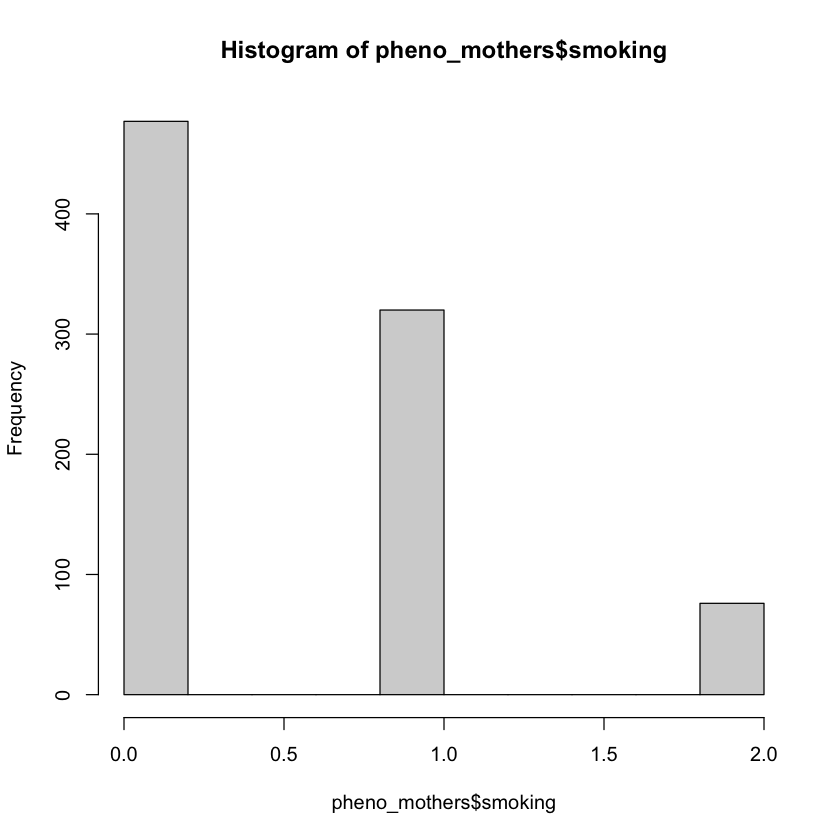

In [69]:
hist(pheno_mothers$smoking)

In [70]:
summary(glm(cannabisUse~smoking,  data=pheno_mothers))


Call:
glm(formula = cannabisUse ~ smoking, data = pheno_mothers)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-0.97238   0.02762   0.02762   0.13997   0.25231  

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.97238    0.01208 163.214  < 2e-16 ***
smoking     -0.11234    0.01430  -7.858 1.15e-14 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for gaussian family taken to be 0.07534321)

    Null deviance: 70.201  on 871  degrees of freedom
Residual deviance: 65.549  on 870  degrees of freedom
  (74 observations deleted due to missingness)
AIC: 223.89

Number of Fisher Scoring iterations: 2


### Drinking

In [71]:
table(pheno_mothers$drinking)

pheno_mothers[which(pheno_mothers$drinking == "Current"), "drinking" ] <- 2
pheno_mothers[which(pheno_mothers$drinking == "Ever"), "drinking" ] <- 1
pheno_mothers[which(pheno_mothers$drinking == "Never"), "drinking" ] <- 0
pheno_mothers$drinking <- as.integer(pheno_mothers$drinking)
table(pheno_mothers$drinking)


Current    Ever   Never 
    662     255      13 


  0   1   2 
 13 255 662 

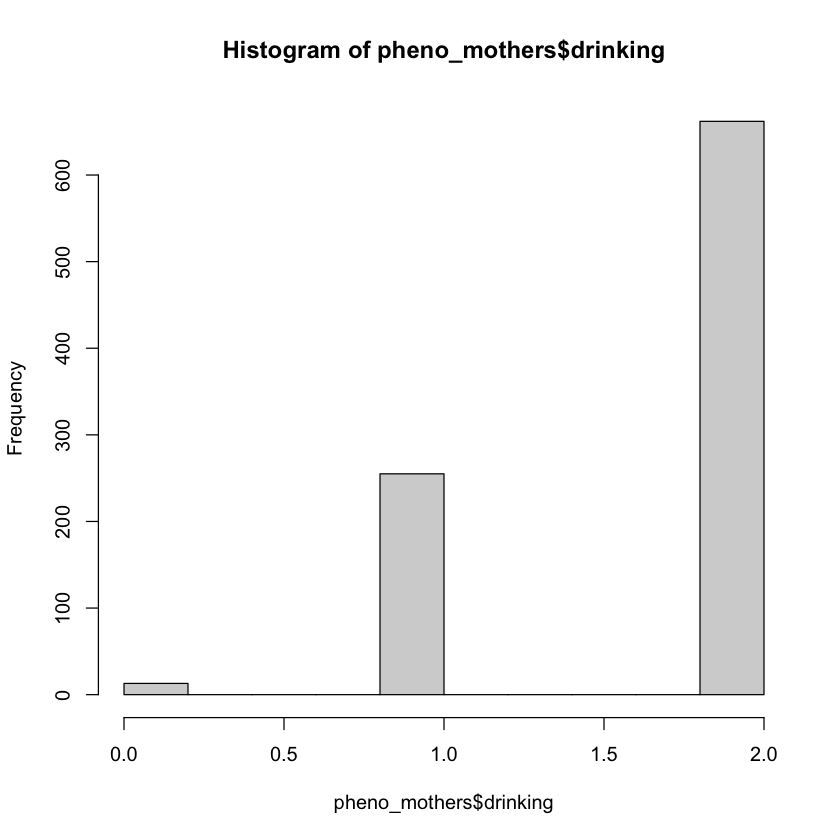

In [72]:
hist(pheno_mothers$drinking)

In [73]:
summary(glm(cannabisUse~drinking,  data=pheno_mothers))


Call:
glm(formula = cannabisUse ~ drinking, data = pheno_mothers)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-0.93601   0.07643   0.08887   0.08887   0.08887  

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.93601    0.03321  58.296   <2e-16 ***
drinking    -0.01244    0.01878  -0.662    0.508    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for gaussian family taken to be 0.07801356)

    Null deviance: 72.275  on 927  degrees of freedom
Residual deviance: 72.241  on 926  degrees of freedom
  (18 observations deleted due to missingness)
AIC: 270.34

Number of Fisher Scoring iterations: 2


In [75]:
head(pheno_mothers,2)

,Sample_Name,cidB3176,ALN,qlet,age_at_DNAm,cannabisUse,smoking,drinking,BMI,Bcell,⋯,CD8T,Gran,Mono,NK,sv1,sv2,sv3,sv4,sv5,sv6
,<chr>,<int>,<int>,<chr>,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,SLIDE1_R01C02,16631,33734,A,47,2,0,2,21.7191,0.13338220,⋯,0,0.466291,0.07133092,0.1791828,16055.045,4235.988,-3047.956,-8862.0433,-5299.007,-3390.971
2,SLIDE1_R03C01,18360,41525,A,53,2,2,1,35.0992,0.06719821,⋯,0,0.614241,0.11582733,0.1241623,-2470.976,-2476.585,2841.127,381.4923,-5396.112,-1125.347


## Children

In [78]:
### R 
pheno_kids <- read.csv("pheno_kids_combined_f15_f17_n924_ewas.txt",
                         sep = " ")
dim(pheno_kids)
head(pheno_kids, 2)

[1] 924  20

,Sample_Name,cidB3176,ALN,qlet,age_at_DNAm,cannabisUse,smoking,drinking,Bcell,CD4T,CD8T,Gran,Mono,NK,sv1,sv2,sv3,sv4,sv5,sv6
,<chr>,<int>,<int>,<chr>,<dbl>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,SLIDE1_R01C01,1616,37866,A,18.58333,2,Ever,Ever,0.15267359,0.20200371,0,0.4967325,0.02320835,0.2150531,16833.816,5123.027,-4626.485,-13458.281,-4932.056,-1745.429
2,SLIDE1_R02C02,4499,51486,A,17.41667,2,Never,Ever,0.08958536,0.07228857,0,0.6474843,0.11213547,0.1357735,8811.775,2096.765,3076.734,-6358.334,-3477.816,-1433.412


In [79]:
table(pheno_kids$cannabisUse)
prop.table(table(pheno_kids$cannabisUse))


  1   2 
372 552 


        1         2 
0.4025974 0.5974026 

```
1 means ever used cannabis, and 2 means never used.
 -- Fang Fang
```

Generalized Linear Model (GLM). See the YouTube videos [GLM Intro - 1 - Linear Models vs. Generalized Linear Models](https://www.youtube.com/watch?v=ddCO2714W-o) and [Logistic Regression in R, Clearly Explained!!!!](https://www.youtube.com/watch?v=C4N3_XJJ-jU) for a explanations and a tutorial of using the R glm function. 
```
GLM in R is a class of regression models that supports non-normal distributions and can be implemented in R through glm() function
```

Try to predict cannabisUse using only the BMI of each sample. Use formula syntax to specify that we want to use BMI to predict cannabisUse.


### Smoking

In [83]:
table(pheno_kids$smoking)

# recode to integers for the EWAS
pheno_kids[which(pheno_kids$smoking == "Current"), "smoking" ] <- 2
pheno_kids[which(pheno_kids$smoking == "Ever"), "smoking" ] <- 1
pheno_kids[which(pheno_kids$smoking == "Never"), "smoking" ] <- 0

table(pheno_kids$smoking)


Current    Ever   Never 
    211     495     218 


  0   1   2 
218 495 211 

In [84]:
pheno_kids$smoking <- as.integer(pheno_kids$smoking)
str(pheno_kids$smoking)

 int [1:924] 1 0 1 1 1 1 1 0 1 2 ...


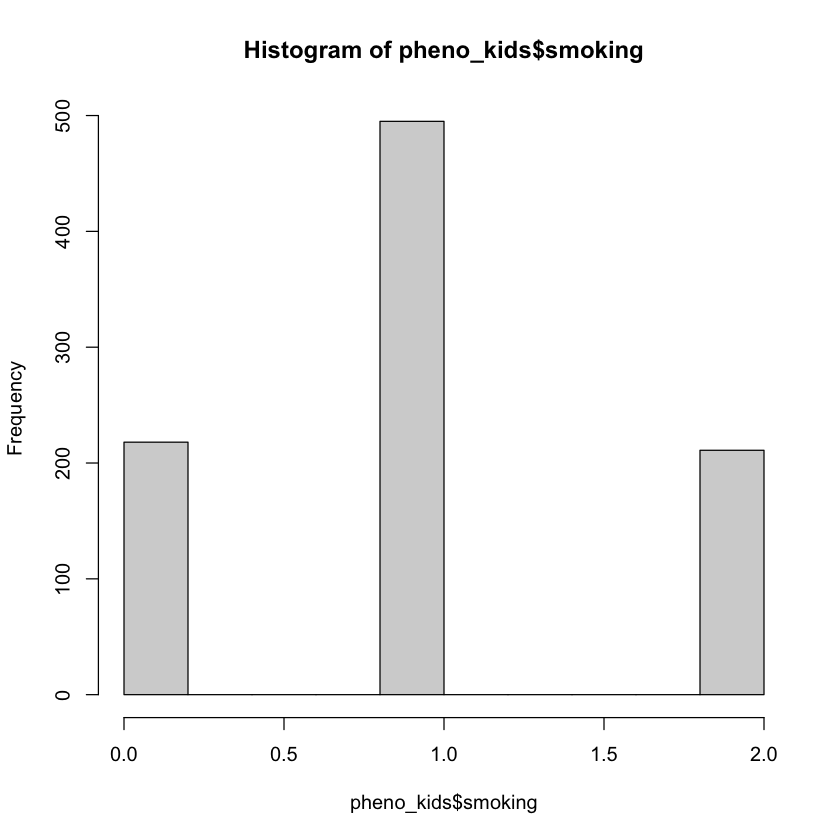

In [86]:
hist(pheno_kids$smoking)

In [87]:
summary(glm(cannabisUse~smoking,  data=pheno_kids))


Call:
glm(formula = cannabisUse ~ smoking, data = pheno_kids)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-0.97642  -0.21260   0.02358   0.40549   0.78740  

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.97642    0.02419   81.71   <2e-16 ***
smoking     -0.38191    0.02009  -19.01   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for gaussian family taken to be 0.1731782)

    Null deviance: 222.23  on 923  degrees of freedom
Residual deviance: 159.67  on 922  degrees of freedom
AIC: 1006

Number of Fisher Scoring iterations: 2


### Drinking

In [88]:
table(pheno_kids$drinking)

pheno_kids[which(pheno_kids$drinking == "Current"), "drinking" ] <- 2
pheno_kids[which(pheno_kids$drinking == "Ever"), "drinking" ] <- 1
pheno_kids[which(pheno_kids$drinking == "Never"), "drinking" ] <- 0
pheno_kids$drinking <- as.integer(pheno_kids$drinking)
table(pheno_kids$drinking)


Current    Ever   Never 
    575     323      26 


  0   1   2 
 26 323 575 

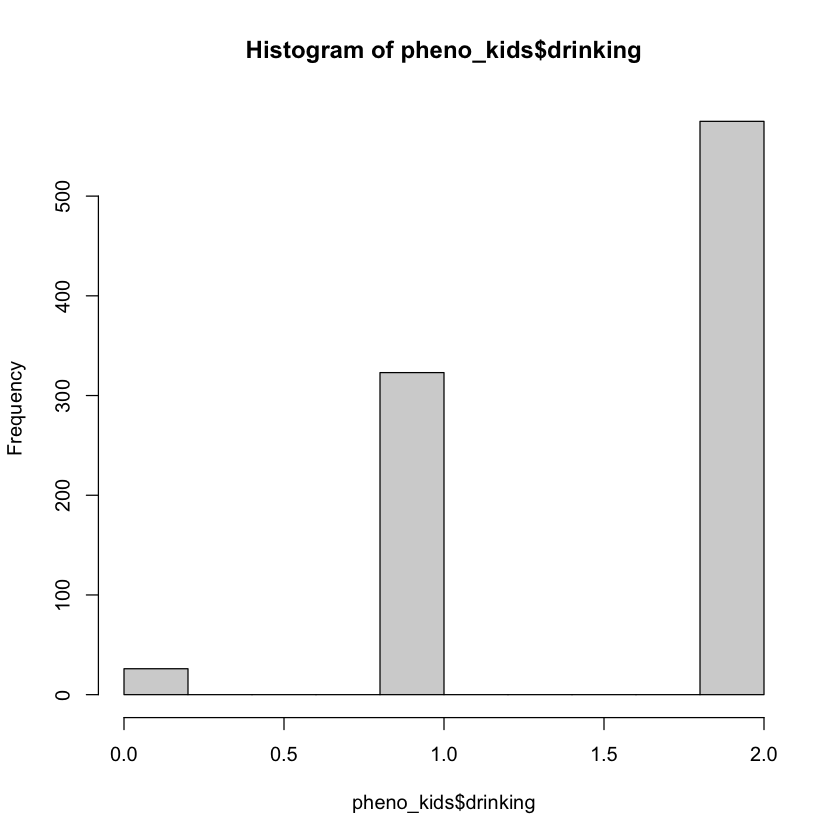

In [89]:
hist(pheno_kids$drinking)

In [90]:
summary(glm(cannabisUse~drinking,  data=pheno_kids))


Call:
glm(formula = cannabisUse ~ drinking, data = pheno_kids)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.9337  -0.5118   0.2772   0.4882   0.4882  

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.93371    0.04851  39.865  < 2e-16 ***
drinking    -0.21096    0.02879  -7.328 5.11e-13 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for gaussian family taken to be 0.2277695)

    Null deviance: 222.23  on 923  degrees of freedom
Residual deviance: 210.00  on 922  degrees of freedom
AIC: 1259.2

Number of Fisher Scoring iterations: 2


In [91]:
head(pheno_kids,2)

,Sample_Name,cidB3176,ALN,qlet,age_at_DNAm,cannabisUse,smoking,drinking,Bcell,CD4T,CD8T,Gran,Mono,NK,sv1,sv2,sv3,sv4,sv5,sv6
,<chr>,<int>,<int>,<chr>,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,SLIDE1_R01C01,1616,37866,A,18.58333,2,1,1,0.15267359,0.20200371,0,0.4967325,0.02320835,0.2150531,16833.816,5123.027,-4626.485,-13458.281,-4932.056,-1745.429
2,SLIDE1_R02C02,4499,51486,A,17.41667,2,0,1,0.08958536,0.07228857,0,0.6474843,0.11213547,0.1357735,8811.775,2096.765,3076.734,-6358.334,-3477.816,-1433.412


# EWAS
Use the automated EWAS workflow `https://github.com/RTIInternational/biocloud_gwas_workflows/tree/master/ewas_association_testing`

**Model 1**
```
DNAm β-value  ~ Lifetime_cannabis_use + age + sex + Technical + WBC proportions + cohort-specific covariates 
```

**Model 2**
```
DNAm β-value  ~ smoking + Lifetime_cannabis_use + age + sex + Technical + WBC proportions + cohort-specific covariates 
```

**Model 3**
```
DNAm β-value  ~ drinking + Lifetime_cannabis_use + age + sex + Technical + WBC proportions + cohort-specific covariates 
```

**Model 4**
```
DNAm β-value  ~ drinking + smoking + BMI + Lifetime_cannabis_use + age + sex + Technical + WBC proportions + cohort-specific covariates 
```

*Note* 
* We do not need to include sex for the mothers 
* The children do not have BMI data

In [ ]:
main_dir=/home/ec2-user/rti-cannabis/ewas/alspac/scripts/biocloud_gwas_workflows/ewas_association_testing

cd $main_dir
git rev-parse HEAD > git_hash.txt
cd ../../
zip -r biocloud_gwas_workflows/ewas_association_testing/biocloud_gwas_workflows.zip biocloud_gwas_workflows/ewas_association_testing/*

curl -X POST "http://localhost:8000/api/workflows/v1" -H "accept: application/json" \
    -F "workflowSource=@${main_dir}/main.wdl" \
    -F "workflowInputs=@${main_dir}/inputs.json" \
    -F "workflowDependencies=@${main_dir}/biocloud_gwas_workflows.zip" \
    -F "workflowOptions=@/home/ec2-user/bin/cromwell/cannabis_charge_code.json"


# mothers
job=10be0e60-0e4e-4b0b-9b58-8eab09b5e34e # model 1. p_bh=0.05
job=aac6a38a-3da9-400e-8b28-027475146e02 # model 2. p_bh=0.05
job=4f81ad5a-2b54-4418-8765-97c90b85fd35 # mod3. p_bh=0.05
job=7775aaeb-da60-43f7-b7ce-7b54fda87008 # mod4. p_bh=0.05
####################################################################################################
# children
job=3dae4185-de84-4144-92ee-5cf416819d46 # mod1
job=e46894d1-8488-4994-a565-58f17b3f7cd1 # mod2
job=f73d437a-25d3-4d2b-829e-2fbc39f4ba8f # mod3
job=5f9cd220-56f2-4464-a24d-97abf97e7929 # mod4

curl -X GET "http://localhost:8000/api/workflows/v1/${job}/status"

## Childrens Never Smokers
Cannabis use in never smokers.

| Never Smokers | cannabisUse 1 | cannabisUse 2 |
|---------------|---------------|---------------|
| 218           | 20            | 198           |


According to Fang Fang 1=ever and 2=never.

In [ ]:
cd /home/ec2-user/rti-cannabis/ewas/alspac/ git clone https://github.com/RTIInternational/biocloud_gwas_workflows/ 
main_dir=/home/ec2-user/rti-cannabis/ewas/alspac/biocloud_gwas_workflows/ewas_association_testing

cd $main_dir

git rev-parse HEAD > git_hash.txt
# edit input.json

cd ../../
zip -r biocloud_gwas_workflows/ewas_association_testing/biocloud_gwas_workflows.zip biocloud_gwas_workflows/ewas_association_testing/*

curl -X POST "http://localhost:8000/api/workflows/v1" -H "accept: application/json" \
    -F "workflowSource=@${main_dir}/main.wdl" \
    -F "workflowInputs=@${main_dir}/inputs.json" \
    -F "workflowDependencies=@${main_dir}/biocloud_gwas_workflows.zip" \
    -F "workflowOptions=@/home/ec2-user/bin/cromwell/cannabis_charge_code.json" >>\
    job_id.txt


# children
job=7cdb136b-ba01-416f-95da-861e64322511 # mod1

curl -X GET "http://localhost:8000/api/workflows/v1/${job}/status"